<a href="https://github.com/glebsamarec">Самарец Глєб</a>, 2024

# <h1 align="center">Лабораторна робота №2. Побудова лінійного бінарного класифікатора на основі оптимізації функціонала якості
</h1>

<h2> Завдання для самостійної роботи </h2>

<ol>
    <li>Імпортував дані для навчальної вибірки згідно з індивідуальним варіантом .</li>
    <li>Побудував бінарний МНК-класифікатор згідно з розглянутим прикладом і вивів результати бінарної класифікації на графіку.

</ol>

Варіант 17:
[1.2, -1]


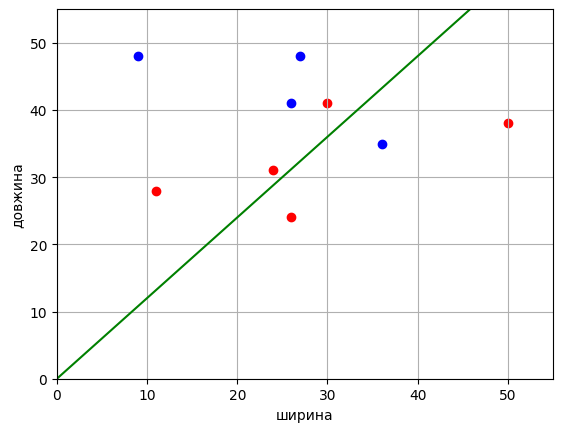

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def classifier(x_train, y_train, variant):

    change = True  # Змінна для перевірки змін у вагах
    n_train = len(x_train)  # Розмір навчального набору даних
    w = [0, -1]  # Початкове значення вектора ваги
    a = lambda x: np.sign(x[0] * w[0] + x[1] * w[1])  # Правило класифікації
    L = 0.1  # Крок зміни ваги
    e = 0.1  # Невелика додаткова величина до w0, щоб забезпечити зазор між лінією розділення та областю
    count = 0  # Лічильник ітерацій
    last_error_index = -1  # Індекс останньої помилково класифікованої спостереження
    while change and count < 100:
        change = False
        for i in range(n_train):  # Ітерація по спостереженням
            if y_train[i] * a(x_train[i]) < 0:  # Якщо помилка класифікації,
                w[0] = w[0] + L * y_train[i]  # То коригування ваги w0
                last_error_index = i
                change = True

        Q = sum([1 for i in range(n_train) if y_train[i] * a(x_train[i]) < 0])
        if Q == 0:  # Показник якості класифікації (кількість помилок)
            break  # Зупинка, якщо всі класифікуються правильно
        count += 1
    if last_error_index > -1:
        w[0] = w[0] + e * y_train[last_error_index]

    print(f"Варіант {variant}:")  # Друк варіанту
    print(w)

    line_x = list(range(max(x_train[:, 0])))  # Створення графіка роздільної лінії
    line_y = [w[0] * x for x in line_x]

    x_0 = x_train[y_train == 1]  # Формування точок для першого класу
    x_1 = x_train[y_train == -1]  # та другого класу

    plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
    plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
    plt.plot(line_x, line_y, color='green')

    plt.xlim([0, 55])
    plt.ylim([0, 55])
    plt.ylabel("довжина")
    plt.xlabel("ширина")
    plt.grid(True)
    plt.show()

x_train_2 = np.array([[26, 41], [11, 28], [27, 48], [24, 31], [9, 48], [26, 24], [50, 38], [30, 41], [36, 35]])
y_train_2 = np.array([-1, 1, -1, 1, -1, 1, 1, 1, -1])
variant = 17
classifier(x_train_2, y_train_2, variant)


<h1 align="center">Контрольні запитання</h1>

1.Що таке відступ (margin) і яка його роль в побудові моделі класифікації? <br><br>
   <b>
   Відступ (margin) - це відстань від точки даних до роздільної гіперплощини у моделі класифікації. Роль відступу полягає в тому, що він визначає міру впевненості моделі у правильності класифікації об'єкта. Більший відступ вказує на більш впевнену класифікацію, тоді як менший відступ може свідчити про більшу невпевненість.
   </b><br><br>
2.Яка роль функції втрат і чому не можна знайти коефіцієнти лінійного класифікатора шляхом безпосереднього розв'язаня задачі оптимізації через знаходження похідної? <br><br>
   <b>
Функція втрат - це функція, яка вимірює рівень помилок між прогнозованими значеннями моделі та фактичними значеннями у навчальних даних. Роль функції втрат полягає в тому, щоб навчити модель шукати оптимальні значення параметрів, які мінімізують ці помилки. Безпосереднє розв'язання задачі оптимізації через знаходження похідної не завжди можливе через нелінійність та складність функції втрат.
  </b><br><br>
3.Чим приницпово розрізняється алгоритм, розглянутий у цій роботі від алгоритму, розглянутого у лаб. роб 1?<br><br>
   <b>
  Обидва наведені алгоритми виглядають подібно, але вони різняться в своїй функціональності та цілях:

Перший алгоритм:

-Генерує перший варіант даних x_train_1 та y_train_1.<br>
-Генерує додаткові варіанти даних (від 2-го до 15-го).<br>
-У кожному додатковому варіанті перевіряється, чи міститься він вже в x_train_1, і якщо так, то видаляється перетин, а результати виводяться.<br>
-Після генерації всіх додаткових варіантів, виводяться всі дані, включаючи перший варіант та всі додаткові.<br>

Другий алгоритм:

-Також генерує перший варіант даних x_train_1 та y_train_1. <br>
-Також генерує додаткові варіанти даних (від 2-го до 15-го). <br>
-У кожному додатковому варіанті також перевіряється, чи міститься він вже в x_train_1, і якщо так, то видаляється перетин. <br>
-Після генерації всіх додаткових варіантів виводяться лише дані для кожного додаткового варіанту, не включаючи перший варіант. <br>

Отже, основна різниця полягає в тому, що перший алгоритм виводить усі дані (включаючи перший варіант та всі додаткові), тоді як другий алгоритм виводить лише дані для кожного додаткового варіанту, інші дані не включаються.
</b><br><br>
4.Вивести математичний вираз для оцінки вектора $\omega$?
<br><br>
   <b>Оцінка вектора **ω** в алгоритмі персептрона проводиться через ітераційний процес навчання, де змінні ваги оновлюються на кожному кроці. Однак, математично, можна виразити оцінку вектора **ω** на основі даних та навчальних міток.

Основна ідея полягає у тому, що вектор **ω** повинен бути таким, що правильно класифікує всі точки навчального набору даних. Це означає, що для кожної точки **(xi, yi)**, де **xi** - вектор ознак, а **yi** - мітка класу (-1 або 1), має виконуватися:

yi (ω · xi) > 0

де **·** позначає скалярний добуток.

Отже, можна сформулювати наступний математичний вираз для оцінки вектора **ω**:

**ω** = arg min_ω Σ_i=1^n (yi (ω · xi))

де **n** - кількість точок у навчальному наборі даних.

Цей вираз вказує на те, що вектор **ω** вибирається таким чином, щоб мінімізувати суму значень yi (ω · xi) для всіх точок навчального набору даних.
  </b>
